In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv("ny_taxi_data.csv")

In [4]:
data = df["passenger_count"].values

In [5]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data.reshape(-1, 1))

sequence_length = 5  # Adjust this as needed
sequences = []
targets = []

for i in range(len(data) - sequence_length):
    sequences.append(data[i:i+sequence_length])
    targets.append(data[i+sequence_length])

sequences = np.array(sequences)
targets = np.array(targets)

In [6]:
sequences

array([[[0. ],
        [0. ],
        [0. ],
        [0. ],
        [0. ]],

       [[0. ],
        [0. ],
        [0. ],
        [0. ],
        [1. ]],

       [[0. ],
        [0. ],
        [0. ],
        [1. ],
        [0.6]],

       ...,

       [[0.4],
        [0. ],
        [0. ],
        [0. ],
        [0. ]],

       [[0. ],
        [0. ],
        [0. ],
        [0. ],
        [0. ]],

       [[0. ],
        [0. ],
        [0. ],
        [0. ],
        [0. ]]])

In [7]:
targets

array([[1. ],
       [0.6],
       [0. ],
       ...,
       [0. ],
       [0. ],
       [0. ]])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(sequences, targets, test_size=0.2, random_state=42)

In [12]:
X_train.shape[1]
# X_train.shape[2]

5

In [24]:
model_rnn = keras.Sequential(name="RNN")
model_rnn.add(keras.layers.SimpleRNN(100, activation='relu', input_shape=(X_train.shape[1], 1)))
model_rnn.add(keras.layers.Dense(1))
model_rnn.compile(optimizer='adam', loss='mean_squared_error')

In [25]:
model_rnn.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10


403/403 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0710
Epoch 2/10
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0693
Epoch 3/10
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0710
Epoch 4/10
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0712
Epoch 5/10
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0702
Epoch 6/10
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0706
Epoch 7/10
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0699
Epoch 8/10
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0712
Epoch 9/10
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0698
Epoch 10/10
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0702


In [19]:
model_lstm = keras.Sequential(name="LSTM")
model_lstm.add(keras.layers.LSTM(100, activation='relu', input_shape=(X_train.shape[1], 1)))
model_lstm.add(keras.layers.Dense(1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

In [21]:
model_lstm.fit(X_train, y_train, epochs=10, batch_size=32, verbose=2)

Epoch 1/10
403/403 - 2s - 5ms/step - loss: 0.0704
Epoch 2/10
403/403 - 2s - 5ms/step - loss: 0.0703
Epoch 3/10
403/403 - 2s - 5ms/step - loss: 0.0704
Epoch 4/10
403/403 - 2s - 5ms/step - loss: 0.0704
Epoch 5/10
403/403 - 2s - 5ms/step - loss: 0.0704
Epoch 6/10
403/403 - 2s - 5ms/step - loss: 0.0703
Epoch 7/10
403/403 - 2s - 5ms/step - loss: 0.0703
Epoch 8/10
403/403 - 2s - 5ms/step - loss: 0.0703
Epoch 9/10
403/403 - 2s - 5ms/step - loss: 0.0704
Epoch 10/10
403/403 - 2s - 5ms/step - loss: 0.0703


In [22]:
model_gru = keras.Sequential(name="GRU")
model_gru.add(keras.layers.GRU(100, activation='relu', input_shape=(X_train.shape[1], 1)))
model_gru.add(keras.layers.Dense(1))
model_gru.compile(optimizer='adam', loss='mean_squared_error')

In [23]:
model_gru.fit(X_train, y_train, epochs=10, batch_size=32, verbose=2)

Epoch 1/10
403/403 - 5s - 13ms/step - loss: 0.0709
Epoch 2/10
403/403 - 3s - 7ms/step - loss: 0.0705
Epoch 3/10
403/403 - 3s - 6ms/step - loss: 0.0705
Epoch 4/10
403/403 - 3s - 6ms/step - loss: 0.0704
Epoch 5/10
403/403 - 3s - 6ms/step - loss: 0.0705
Epoch 6/10
403/403 - 3s - 6ms/step - loss: 0.0704
Epoch 7/10
403/403 - 2s - 6ms/step - loss: 0.0704
Epoch 8/10
403/403 - 2s - 6ms/step - loss: 0.0704
Epoch 9/10
403/403 - 2s - 6ms/step - loss: 0.0704
Epoch 10/10
403/403 - 2s - 6ms/step - loss: 0.0704


In [26]:
def evaluate_model(model, X_test, y_test):
    X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
    y_pred = model.predict(X_test_reshaped)
    y_pred = scaler.inverse_transform(y_pred).flatten()
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
    mse = mean_squared_error(y_test, y_pred)
    return mse

mse_rnn = evaluate_model(model_rnn, X_test, y_test)
mse_lstm = evaluate_model(model_lstm, X_test, y_test)
mse_gru = evaluate_model(model_gru, X_test, y_test)

print(f"RNN Mean Squared Error: {mse_rnn}")
print(f"LSTM Mean Squared Error: {mse_lstm}")
print(f"GRU Mean Squared Error: {mse_gru}")

101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
RNN Mean Squared Error: 1.6785905042799119
LSTM Mean Squared Error: 1.673665506081042
GRU Mean Squared Error: 1.680529695895013


101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


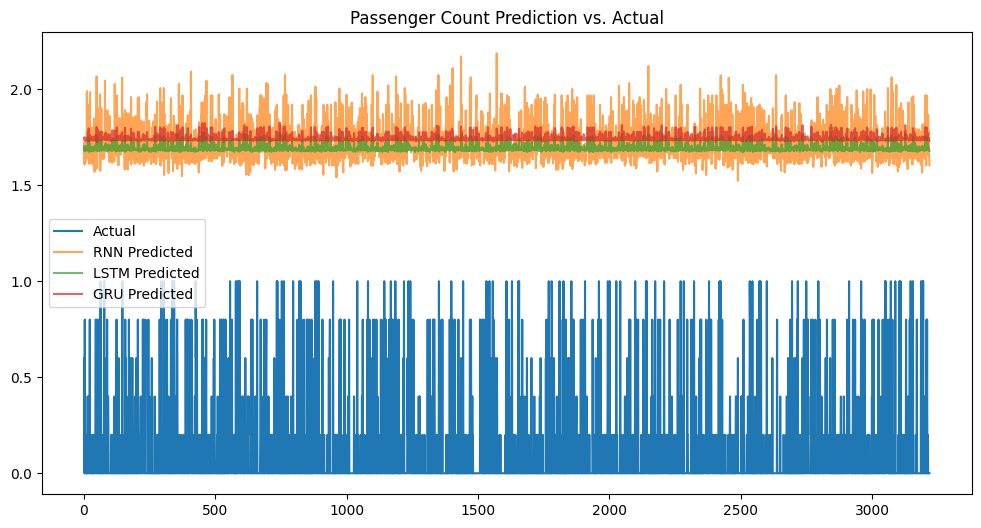

In [27]:
y_pred_rnn = model_rnn.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
y_pred_rnn = scaler.inverse_transform(y_pred_rnn).flatten()

y_pred_lstm = model_lstm.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
y_pred_lstm = scaler.inverse_transform(y_pred_lstm).flatten()

y_pred_gru = model_gru.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
y_pred_gru = scaler.inverse_transform(y_pred_gru).flatten()

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_rnn, label='RNN Predicted', alpha=0.7)
plt.plot(y_pred_lstm, label='LSTM Predicted', alpha=0.7)
plt.plot(y_pred_gru, label='GRU Predicted', alpha=0.7)
plt.legend()
plt.title('Passenger Count Prediction vs. Actual')
plt.show()